In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import json
import numpy as np
import pandas as pd
import random

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    plot_confusion_matrix,
)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from weight_lifting import WeightLifting
from sfs_features import (
    get_lr_features,
    get_svm_features,
    get_mpl_features,
    get_dtc_features
)
from features import timed_features, summary_features

from sklearn.ensemble import IsolationForest

In [4]:
np.random.seed(42)
random.seed(42)

### BASE PADRAO

In [5]:
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test, state="INICIAL")
df.shape

(4024, 153)

Model: LR
            Valor
Accuracy   0.9652
F1         0.9363
Precision  0.9263
Recall     0.9504

[[319   6   0   0   0]
 [ 14 196   8   0   0]
 [  1   1  24   0   0]
 [  0   0   0  62   3]
 [  0   0   0   2 370]]

              precision    recall  f1-score      support
A              0.955090  0.981538  0.968134   325.000000
B              0.965517  0.899083  0.931116   218.000000
C              0.750000  0.923077  0.827586    26.000000
D              0.968750  0.953846  0.961240    65.000000
E              0.991957  0.994624  0.993289   372.000000
accuracy       0.965209  0.965209  0.965209     0.965209
macro avg      0.926263  0.950434  0.936273  1006.000000
weighted avg   0.966564  0.965209  0.965336  1006.000000



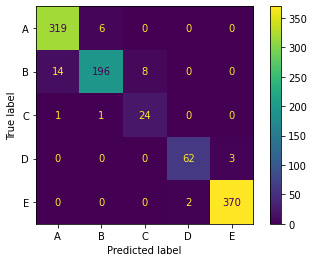

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9821
F1         0.9731
Precision  0.9899
Recall     0.9582

[[320   0   0   0   5]
 [  0 211   0   0   7]
 [  0   2  23   0   1]
 [  0   0   0  62   3]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              1.000000  0.984615  0.992248   325.000000
B              0.990610  0.967890  0.979118   218.000000
C              1.000000  0.884615  0.938776    26.000000
D              1.000000  0.953846  0.976378    65.000000
E              0.958763  1.000000  0.978947   372.000000
accuracy       0.982107  0.982107  0.982107     0.982107
macro avg      0.989875  0.958193  0.973093  1006.000000
weighted avg   0.982717  0.982107  0.982077  1006.000000



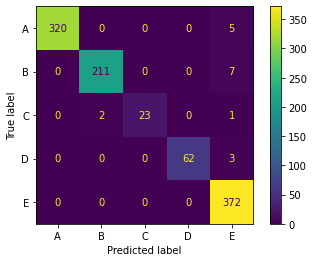

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3231
F1         0.0977
Precision  0.0646
Recall     0.2000

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score      support
A              0.323062  1.000000  0.488355   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.000000  0.000000  0.000000   372.000000
accuracy       0.323062  0.323062  0.323062     0.323062
macro avg      0.064612  0.200000  0.097671  1006.000000
weighted avg   0.104369  0.323062  0.157769  1006.000000



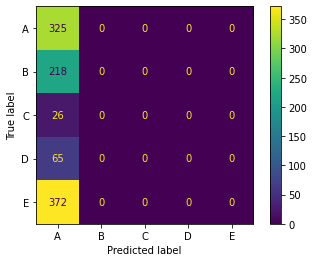

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.7097
F1         0.4390
Precision  0.4480
Recall     0.4733

[[183 140   0   0   2]
 [ 12 198   0   0   8]
 [  0  23   0   0   3]
 [  0   0   0   0  65]
 [  1  38   0   0 333]]

              precision    recall  f1-score      support
A              0.933673  0.563077  0.702495   325.000000
B              0.496241  0.908257  0.641815   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.810219  0.895161  0.850575   372.000000
accuracy       0.709742  0.709742  0.709742     0.709742
macro avg      0.448027  0.473299  0.438977  1006.000000
weighted avg   0.708773  0.709742  0.680557  1006.000000



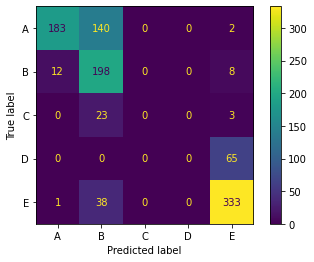

--------------------------------------------


In [6]:
engine.plot_results(base_padrao_predict, X_test, y_test)

## Pré processamento

In [7]:
df = engine.load_df()
df = engine.clean_data(df)
df = engine.select_features(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
fse_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test, state="FSE")
# df.shape

Model: LR
            Valor
Accuracy   0.9929
F1         0.9862
Precision  0.9810
Recall     0.9921

[[326   2   0   0   0]
 [  2 220   2   0   0]
 [  0   0  24   0   0]
 [  0   0   0  63   1]
 [  0   0   0   0 344]]

              precision    recall  f1-score     support
A              0.993902  0.993902  0.993902  328.000000
B              0.990991  0.982143  0.986547  224.000000
C              0.923077  1.000000  0.960000   24.000000
D              1.000000  0.984375  0.992126   64.000000
E              0.997101  1.000000  0.998549  344.000000
accuracy       0.992886  0.992886  0.992886    0.992886
macro avg      0.981014  0.992084  0.986225  984.000000
weighted avg   0.993027  0.992886  0.992910  984.000000



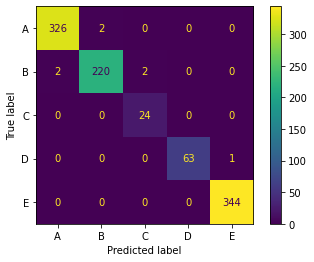

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9990
F1         0.9953
Precision  0.9991
Recall     0.9917

[[328   0   0   0   0]
 [  0 224   0   0   0]
 [  0   1  23   0   0]
 [  0   0   0  64   0]
 [  0   0   0   0 344]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  328.000000
B              0.995556  1.000000  0.997773  224.000000
C              1.000000  0.958333  0.978723   24.000000
D              1.000000  1.000000  1.000000   64.000000
E              1.000000  1.000000  1.000000  344.000000
accuracy       0.998984  0.998984  0.998984    0.998984
macro avg      0.999111  0.991667  0.995299  984.000000
weighted avg   0.998988  0.998984  0.998974  984.000000



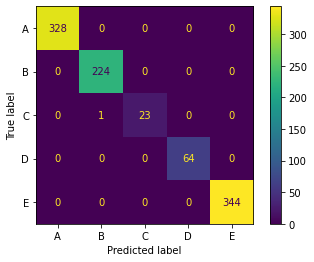

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3333
F1         0.1000
Precision  0.0667
Recall     0.2000

[[328   0   0   0   0]
 [224   0   0   0   0]
 [ 24   0   0   0   0]
 [ 64   0   0   0   0]
 [344   0   0   0   0]]

              precision    recall  f1-score     support
A              0.333333  1.000000  0.500000  328.000000
B              0.000000  0.000000  0.000000  224.000000
C              0.000000  0.000000  0.000000   24.000000
D              0.000000  0.000000  0.000000   64.000000
E              0.000000  0.000000  0.000000  344.000000
accuracy       0.333333  0.333333  0.333333    0.333333
macro avg      0.066667  0.200000  0.100000  984.000000
weighted avg   0.111111  0.333333  0.166667  984.000000



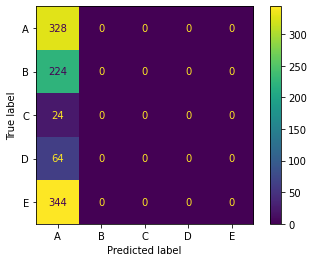

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.6372
F1         0.5195
Precision  0.5617
Recall     0.5701

[[166 151   0   6   5]
 [ 10 212   0   0   2]
 [  4  20   0   0   0]
 [  0   9   0  53   2]
 [  6 101   0  41 196]]

              precision    recall  f1-score     support
A              0.892473  0.506098  0.645914  328.000000
B              0.430020  0.946429  0.591353  224.000000
C              0.000000  0.000000  0.000000   24.000000
D              0.530000  0.828125  0.646341   64.000000
E              0.956098  0.569767  0.714026  344.000000
accuracy       0.637195  0.637195  0.637195    0.637195
macro avg      0.561718  0.570084  0.519527  984.000000
weighted avg   0.764099  0.637195  0.641579  984.000000



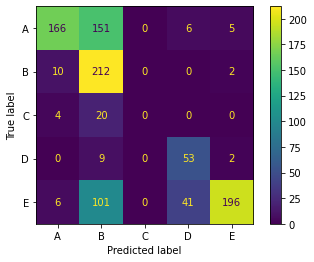

--------------------------------------------


In [8]:
engine.plot_results(fse_predict, X_test, y_test)

### FEATURE SELECTION WITH SequentialFeatureSelector 

In [9]:
# sfs_predict = []

# # LOGISTIC REGRESSION
# lr_X_train, lr_X_test, lr_y_train, lr_y_test = engine.create_train_test(df, features=timed_features)
# lr_predict = engine.fit_and_predict(lr_X_train, lr_X_test, lr_y_train, lr_y_test, state="SFS")
# lr_predict = lr_predict[0:1][0] # Somente o LR interessa
# sfs_predict.append(lr_predict)

# # SUPORT VECTOR MACHINES
# svm_X_train, svm_X_test, svm_y_train, svm_y_test = engine.create_train_test(df, features=timed_features)
# svm_predict = engine.fit_and_predict(svm_X_train, svm_X_test, svm_y_train, svm_y_test, state="SFS")
# svm_predict = svm_predict[1:2][0] # Somente o SVM interessa
# sfs_predict.append(svm_predict)

# # MULTILAYER PERCEPTRON
# mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test = engine.create_train_test(df, features=timed_features)
# mpl_predict = engine.fit_and_predict(mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test, state="SFS")
# mpl_predict = mpl_predict[2:3][0] # Somente o mpl interessa
# sfs_predict.append(mpl_predict)


# # MULTILAYER PERCEPTRON
# iso_dtc_X_train, iso_dtc_X_test, iso_dtc_y_train, iso_dtc_y_test = engine.create_train_test(df, features=timed_features)
# dtc_predict = engine.fit_and_predict(iso_dtc_X_train, iso_dtc_X_test, iso_dtc_y_train, iso_dtc_y_test, state="SFS")
# dtc_predict = dtc_predict[3:4][0] # Somente o mpl interessa
# sfs_predict.append(dtc_predict)

In [10]:
# engine.plot_results([sfs_predict[0]], lr_X_test, lr_y_test)
# engine.plot_results([sfs_predict[1]], svm_X_test, svm_y_test)
# engine.plot_results([sfs_predict[2]], mlp_X_test, mlp_y_test)
# engine.plot_results([sfs_predict[3]], iso_dtc_X_test, iso_dtc_y_test)

### ISOLATION FOREST

In [11]:
iso = IsolationForest(contamination=0.05)
predict = iso.fit_predict(df.iloc[:, 0:-1])

mask = predict != -1

iso_X_train, iso_X_test, iso_y_train, iso_y_test = engine.create_train_test(df.iloc[mask])

isolation_predict = engine.fit_and_predict(iso_X_train, iso_X_test, iso_y_train, iso_y_test, state="ISO")

Model: LR
            Valor
Accuracy   0.9797
F1         0.9613
Precision  0.9458
Recall     0.9792

[[329   5   0   0   0]
 [  2 208   5   0   0]
 [  1   0  27   0   0]
 [  0   0   0  67   0]
 [  0   0   0   6 285]]

              precision    recall  f1-score     support
A              0.990964  0.985030  0.987988  334.000000
B              0.976526  0.967442  0.971963  215.000000
C              0.843750  0.964286  0.900000   28.000000
D              0.917808  1.000000  0.957143   67.000000
E              1.000000  0.979381  0.989583  291.000000
accuracy       0.979679  0.979679  0.979679    0.979679
macro avg      0.945810  0.979228  0.961335  935.000000
weighted avg   0.980805  0.979679  0.979954  935.000000



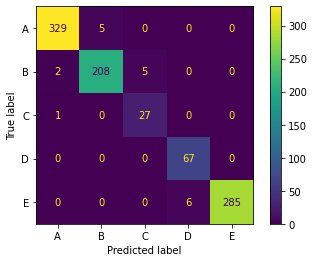

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9968
F1         0.9903
Precision  0.9837
Recall     0.9975

[[334   0   0   0   0]
 [  0 213   2   0   0]
 [  0   0  28   0   0]
 [  0   0   0  67   0]
 [  0   0   0   1 290]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  334.000000
B              1.000000  0.990698  0.995327  215.000000
C              0.933333  1.000000  0.965517   28.000000
D              0.985294  1.000000  0.992593   67.000000
E              1.000000  0.996564  0.998279  291.000000
accuracy       0.996791  0.996791  0.996791    0.996791
macro avg      0.983725  0.997452  0.990343  935.000000
weighted avg   0.996950  0.996791  0.996826  935.000000



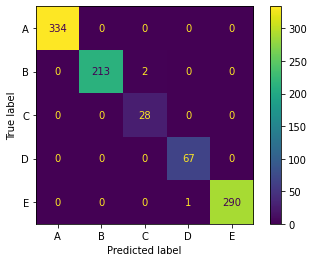

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.4214
F1         0.2016
Precision  0.2488
Recall     0.2605

[[116   0   0   0 218]
 [  0   0   0   0 215]
 [  0   0   0   0  28]
 [  0   0   0   0  67]
 [ 13   0   0   0 278]]

              precision    recall  f1-score    support
A              0.899225  0.347305  0.501080  334.00000
B              0.000000  0.000000  0.000000  215.00000
C              0.000000  0.000000  0.000000   28.00000
D              0.000000  0.000000  0.000000   67.00000
E              0.344913  0.955326  0.506837  291.00000
accuracy       0.421390  0.421390  0.421390    0.42139
macro avg      0.248828  0.260526  0.201583  935.00000
weighted avg   0.428568  0.421390  0.336738  935.00000



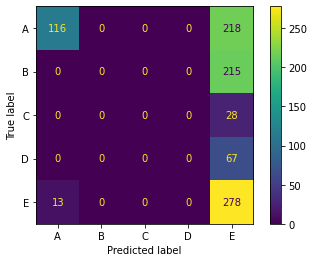

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.7701
F1         0.4734
Precision  0.4608
Recall     0.4986

[[303  31   0   0   0]
 [ 77 126   0   0  12]
 [ 10   9   0   0   9]
 [  0   0   0   0  67]
 [  0   0   0   0 291]]

              precision    recall  f1-score     support
A              0.776923  0.907186  0.837017  334.000000
B              0.759036  0.586047  0.661417  215.000000
C              0.000000  0.000000  0.000000   28.000000
D              0.000000  0.000000  0.000000   67.000000
E              0.767810  1.000000  0.868657  291.000000
accuracy       0.770053  0.770053  0.770053    0.770053
macro avg      0.460754  0.498646  0.473418  935.000000
weighted avg   0.691035  0.770053  0.721441  935.000000



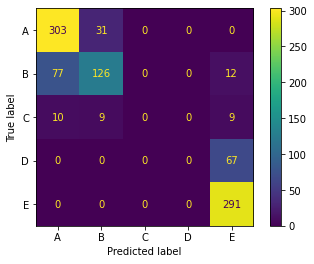

--------------------------------------------


In [12]:
engine.plot_results(isolation_predict, iso_X_test, iso_y_test)

### ISOLATION FOREST + SFS

In [13]:
# iso_sfs_predict = []

# # LOGISTIC REGRESSION
# iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test = engine.create_train_test(df.iloc[mask], features=timed_features)
# iso_lr_predict = engine.fit_and_predict(iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test, state="ISO_SFS")
# iso_lr_predict = iso_lr_predict[0:1][0] # Somente o LR interessa
# iso_sfs_predict.append(iso_lr_predict)

# # SUPORT VECTOR MACHINES
# iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test = engine.create_train_test(df.iloc[mask], features=timed_features)
# iso_svm_predict = engine.fit_and_predict(iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test, state="ISO_SFS")
# iso_svm_predict = iso_svm_predict[1:2][0] # Somente o SVM interessa
# iso_sfs_predict.append(iso_svm_predict)

# # MULTILAYER PERCEPTRON
# iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test = engine.create_train_test(df.iloc[mask], features=timed_features)
# iso_mlp_predict = engine.fit_and_predict(iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test, state="ISO_SFS")
# iso_mlp_predict = iso_mlp_predict[2:3][0] # Somente o mpl interessa
# iso_sfs_predict.append(iso_mlp_predict)


# # DECITION TREE CLASSFIED
# iso_sfs_dtc_X_train, iso_sfs_dtc_X_test, iso_sfs_dtc_y_train, iso_sfs_dtc_y_test = engine.create_train_test(df.iloc[mask], features=timed_features)
# iso_dtc_predict = engine.fit_and_predict(
#     iso_sfs_dtc_X_train, iso_sfs_dtc_X_test, iso_sfs_dtc_y_train, iso_sfs_dtc_y_test, state="ISO_SFS")
# iso_dtc_predict = iso_dtc_predict[3:4][0] # Somente o mpl interessa
# iso_sfs_predict.append(iso_dtc_predict)

In [14]:
# engine.plot_results([iso_sfs_predict[0]], iso_lr_X_test, iso_lr_y_test)
# engine.plot_results([iso_sfs_predict[1]], iso_svm_X_test, iso_svm_y_test)
# engine.plot_results([iso_sfs_predict[2]], iso_mlp_X_test, iso_mlp_y_test)
# engine.plot_results([iso_sfs_predict[3]], iso_sfs_dtc_X_test, iso_sfs_dtc_y_test)

### COMPARACAO DE RESULTADOS

In [15]:
# Unificando os resultados em um unico DF
resultados_df = pd.concat([
    pd.DataFrame(base_padrao_predict),
    pd.DataFrame(fse_predict),
    pd.DataFrame(isolation_predict),

#     pd.DataFrame(iso_sfs_predict),
])

                   classificador                 tecnica  accuracy      f1  \
0            Regressão Logística                 Inicial    0.9652  0.9363   
0            Regressão Logística       Feature Selection    0.9929  0.9862   
0            Regressão Logística  Floresta de Isolamento    0.9797  0.9613   
1  Máquina de Vetores de Suporte                 Inicial    0.9821  0.9731   
1  Máquina de Vetores de Suporte       Feature Selection    0.9990  0.9953   
1  Máquina de Vetores de Suporte  Floresta de Isolamento    0.9968  0.9903   
2        Perceptron Multicamadas                 Inicial    0.3231  0.0977   
2        Perceptron Multicamadas       Feature Selection    0.3333  0.1000   
2        Perceptron Multicamadas  Floresta de Isolamento    0.4214  0.2016   
3              Árvore de Decisão                 Inicial    0.7097  0.4390   
3              Árvore de Decisão       Feature Selection    0.6372  0.5195   
3              Árvore de Decisão  Floresta de Isolamento    0.77

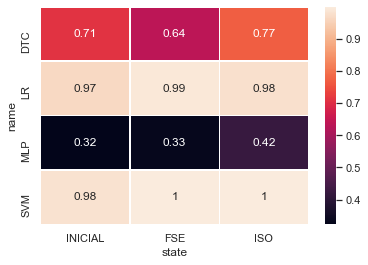

In [16]:
engine.plot_final_results(resultados_df)